Reg Num:  231057006_______________________

---
$$\color{orange}{AML\ 5152\,\lvert\, Applied\ Machine\ Learning\,\lvert\,Lab\ Final\,\lvert\,Odd\ Semester\ 2023}$$
---

**Instructions:**
1. Fill the reg num at the top of this notebook
2. Upload your Jupyter notebook with all its outputs intact here: https://tinyurl.com/tckf29w4
3. Do not solicit inputs from others. Plagiarism check will be performed after the exam

### **Problem Statement**

**PS: DO NOT FORGET TO TRAIN-TEST SPLIT AT AN APPROPRIATE TIME IN THE ENTIRE FLOW**.

You decide where you want to position the train test split in the stages below

#### I. Load the partial dataset (given to you)
1. Dataset has 200 records
2. Datset has five columns - age,tumor_size,tumor_grade,cancer_stage,lymph_node_status
3. cancer_stage is the target variable taking on values I, II, III and IV
4. The rest are predictor variables

#### II. Enhance the dataset
1. Introduce a new feature called CRP (C-reactive protein), that is always numerically 5 more than lymph_node_status
2. Add a new feature called tumor_size_converted as per the formula
 $$ tumor\_size\_converted\ = tumor\_size\ * 10 + standard\ normal\ distributed\ noise$$  
3. Introduce 25% NaNs in these two columns: tumor_size and tumor_size_converted

#### III Data transformation and Visualization
1. Perform a suitable form of imputation for these two features. Which imputation did you choose and why? Do appropriate visualization (if needed) to determine the type of imputation
2. Visualize the distribution of features and apply if any transformation if needed
3. Apply appropriate scaling (such as StandardScaler, RobustScaler) to appropriate features

#### IV Feature Elimination and Feature Selection
1. If there are any features that you can immediately drop without any exploration, programming then please do so first
2. Check which features have highest predictive power wrt target variable
3. Check features on which target is dependent. Use a mechanism that is different from previous method for this.
4. Base on the above two checks, choose 2 features for predicting cancer stage

#### V ML Prediction
1. Apply Logistic Regression to predict cancer stage
2. Choose a  metric that you think is most suitable for this scenario

---

### I. Load the partial dataset

1. Dataset has 200 records
2. Datset has five columns - age,tumor_size,tumor_grade,cancer_stage,lymph_node_status
3. cancer_stage is the target variable taking on values I, II, III and IV
4. The rest are predictor variables

In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)

In [2]:
# Change this line to point to appropriate file location in your workstation/desktop/laptop/Colab
df = pd.read_csv("cancer_dataset.csv")
df.head()

,age,tumor_size,tumor_grade,cancer_stage,lymph_node_status
0,61.5,30.22,3,II,13
1,39.4,37.12,3,I,0
2,39.0,25.84,1,I,5
3,55.4,30.92,1,III,19
4,61.4,32.40,3,III,2


---

### II. Enhance the dataset
1. Introduce a new feature called CRP (C-reactive protein), that is always numerically 5 more than lymph_node_status
2. Add a new feature called tumor_size_converted as per the formula
 $$ tumor\_size\_converted\ = tumor\_size\ * 10 + standard\ normal\ distributed\ noise$$  
3. Introduce 25% NaNs in these two columns: tumor_size and tumor_size_converted

In [3]:
# Your code for adding CRP feature goes here
df['CRP'] = df['lymph_node_status'] + 5

# Display the dataset
df.head(10)


,age,tumor_size,tumor_grade,cancer_stage,lymph_node_status,CRP
0,61.5,30.22,3,II,13,18
1,39.4,37.12,3,I,0,5
2,39.0,25.84,1,I,5,10
3,55.4,30.92,1,III,19,24
4,61.4,32.40,3,III,2,7
5,67.6,40.98,2,II,4,9
6,52.9,37.05,3,II,7,12
7,49.3,33.22,1,IV,3,8
8,36.3,27.92,2,IV,12,17
9,41.8,20.99,1,I,17,22


In [4]:
# Your code for adding tumor_size_converted goes here
#calculate standard normal distributed noise
noise = np.random.normal(0, 0.1, df.shape)
df['tumor_size_converted'] = df['tumor_size'] * 10 + noise[:,0]

In [5]:
df.head(10)

,age,tumor_size,tumor_grade,cancer_stage,lymph_node_status,CRP,tumor_size_converted
0,61.5,30.22,3,II,13,18,302.249671
1,39.4,37.12,3,I,0,5,371.357921
2,39.0,25.84,1,I,5,10,258.424196
3,55.4,30.92,1,III,19,24,309.109198
4,61.4,32.40,3,III,2,7,323.945562
5,67.6,40.98,2,II,4,9,409.739829
6,52.9,37.05,3,II,7,12,370.520886
7,49.3,33.22,1,IV,3,8,332.188435
8,36.3,27.92,2,IV,12,17,279.234362
9,41.8,20.99,1,I,17,22,210.003100


In [6]:
# Your code for adding Nans goes here
num_rows = int(df.shape[0] * 0.25)
nan_rows = np.random.choice(df.index, size=num_rows, replace=False)
df.loc[nan_rows, ['tumor_size', 'tumor_size_converted']] = np.nan
df.head(10)

,age,tumor_size,tumor_grade,cancer_stage,lymph_node_status,CRP,tumor_size_converted
0,61.5,NaN,3,II,13,18,NaN
1,39.4,37.12,3,I,0,5,371.357921
2,39.0,25.84,1,I,5,10,258.424196
3,55.4,NaN,1,III,19,24,NaN
4,61.4,32.40,3,III,2,7,323.945562
5,67.6,NaN,2,II,4,9,NaN
6,52.9,37.05,3,II,7,12,370.520886
7,49.3,33.22,1,IV,3,8,332.188435
8,36.3,27.92,2,IV,12,17,279.234362
9,41.8,20.99,1,I,17,22,210.003100


---

### III Data transformation and Visualization
1. Perform a suitable form of imputation for these two features. Which imputation did you choose and why? Do appropriate visualization (if needed) to determine the type of imputation
2. Visualize the distribution of features and apply if any transformation if needed
3. Apply appropriate scaling (such as StandardScaler, RobustScaler) to appropriate features

In [7]:
# Perform a suitable form of imputation for these two features. 
# Which imputation did you choose and why? Do appropriate visualization (if needed) to determine the type of imputation

# Perform mean imputation for tumor_size
df['tumor_size'].fillna(df['tumor_size'].mean(), inplace=True)
# Perform mean imputation for tumor_size_converted
df['tumor_size_converted'].fillna(df['tumor_size_converted'].mean(), inplace=True)
df.head(10)

# # Perform median imputation for tumor_size
# df['tumor_size'].fillna(df['tumor_size'].median(), inplace=True)
# # Perform mean imputation for tumor_size_converted
# df['tumor_size_converted'].fillna(df['tumor_size_converted'].median(), inplace=True)
# df.head(10)

# from sklearn.impute import KNNImputer
# # Example using scikit-learn for k-nearest neighbors imputation
# imputer = KNNImputer(n_neighbors=3)
# imputed_data = imputer.fit_transform(df[['tumor_size', 'tumor_size_converted']])
# df['column_to_impute'] = imputed_data[:, 0]
# df.head(10)

,age,tumor_size,tumor_grade,cancer_stage,lymph_node_status,CRP,tumor_size_converted
0,61.5,30.646533,3,II,13,18,306.477789
1,39.4,37.120000,3,I,0,5,371.357921
2,39.0,25.840000,1,I,5,10,258.424196
3,55.4,30.646533,1,III,19,24,306.477789
4,61.4,32.400000,3,III,2,7,323.945562
5,67.6,30.646533,2,II,4,9,306.477789
6,52.9,37.050000,3,II,7,12,370.520886
7,49.3,33.220000,1,IV,3,8,332.188435
8,36.3,27.920000,2,IV,12,17,279.234362
9,41.8,20.990000,1,I,17,22,210.003100


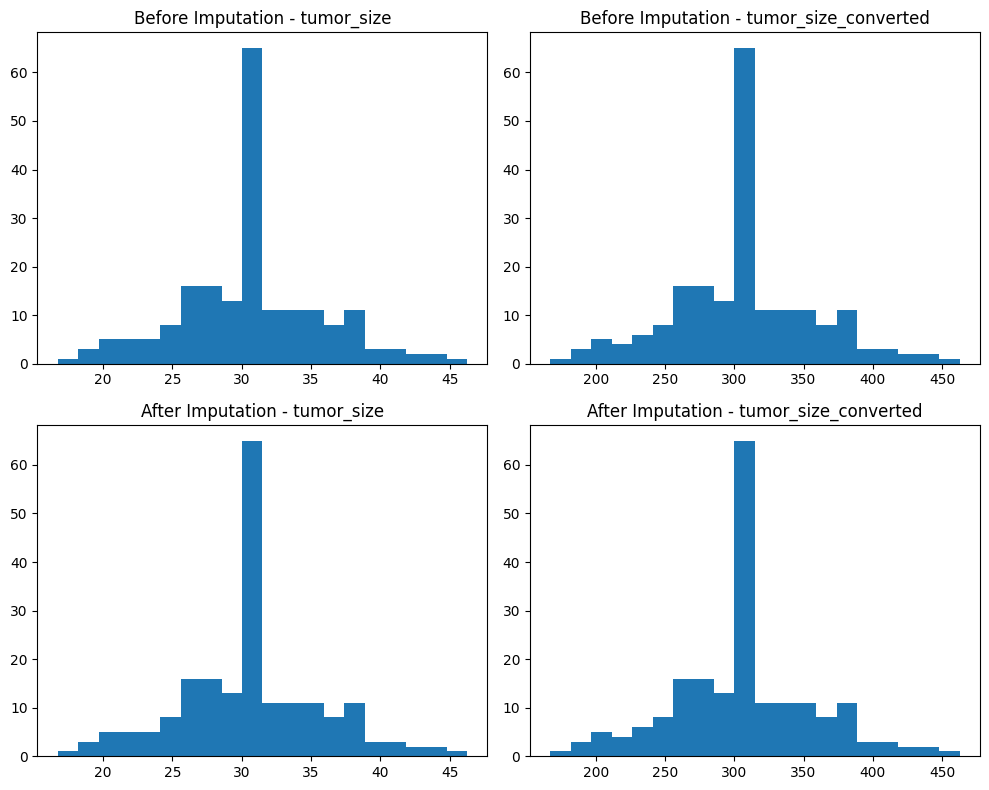

In [8]:
import matplotlib.pyplot as plt

# Create subplots for the histograms
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot the histogram of 'tumor_size' before imputation
axs[0, 0].hist(df['tumor_size'], bins=20)
axs[0, 0].set_title('Before Imputation - tumor_size')

# Plot the histogram of 'tumor_size_converted' before imputation
axs[0, 1].hist(df['tumor_size_converted'], bins=20)
axs[0, 1].set_title('Before Imputation - tumor_size_converted')

# Perform mean imputation for tumor_size
df['tumor_size'].fillna(df['tumor_size'].mean(), inplace=True)

# Perform mean imputation for tumor_size_converted
df['tumor_size_converted'].fillna(df['tumor_size_converted'].mean(), inplace=True)

# Plot the histogram of 'tumor_size' after imputation
axs[1, 0].hist(df['tumor_size'], bins=20)
axs[1, 0].set_title('After Imputation - tumor_size')

# Plot the histogram of 'tumor_size_converted' after imputation
axs[1, 1].hist(df['tumor_size_converted'], bins=20)
axs[1, 1].set_title('After Imputation - tumor_size_converted')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [9]:
df.head()

,age,tumor_size,tumor_grade,cancer_stage,lymph_node_status,CRP,tumor_size_converted
0,61.5,30.646533,3,II,13,18,306.477789
1,39.4,37.120000,3,I,0,5,371.357921
2,39.0,25.840000,1,I,5,10,258.424196
3,55.4,30.646533,1,III,19,24,306.477789
4,61.4,32.400000,3,III,2,7,323.945562


I tried mean, median and KNN imputation. All the 3 imputations gave the same answer. 
It is also note worthy that most of the data in these 2 columns are missing. Hence it is preferable to drop these two columns. 

The histogram above shows the number of imputed values and the range of the imputed values. 

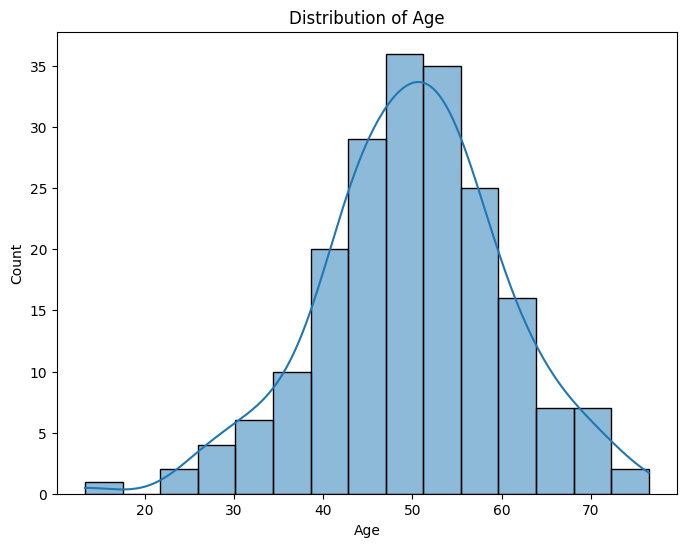

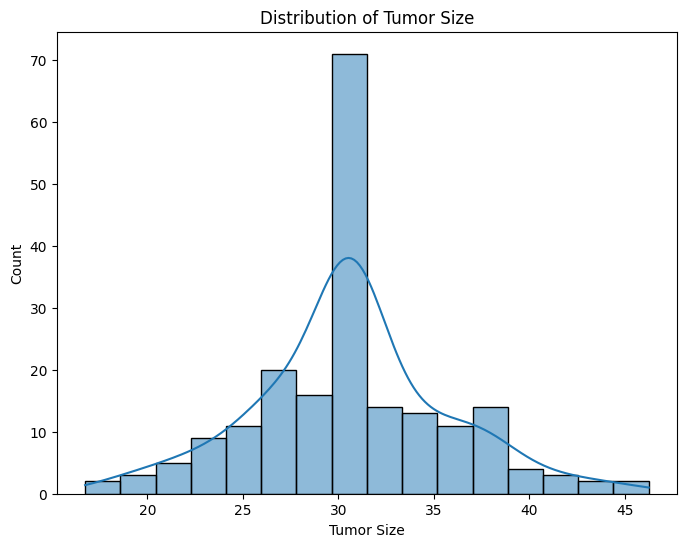

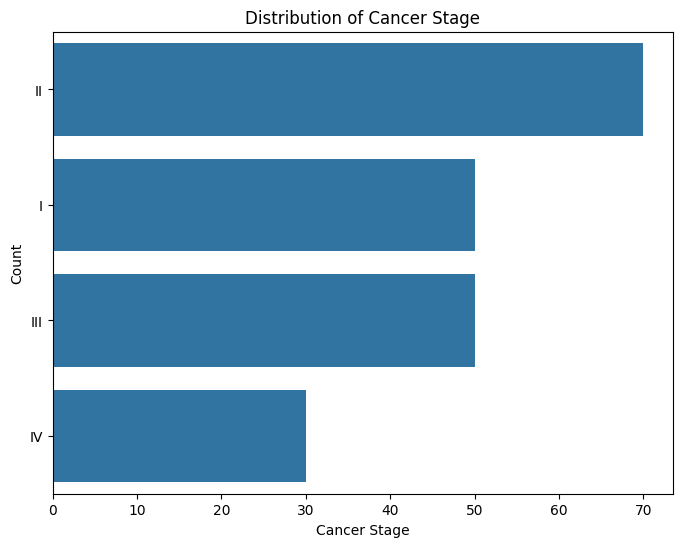

In [10]:
# Visualize the distribution of features and apply if any transformation if needed

import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of 'age' feature
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of 'tumor_size' feature
plt.figure(figsize=(8, 6))
sns.histplot(df['tumor_size'], kde=True)
plt.title('Distribution of Tumor Size')
plt.xlabel('Tumor Size')
plt.ylabel('Count')
plt.show()


# Visualize the distribution of 'cancer_stage' feature
plt.figure(figsize=(8, 6))
sns.countplot(df['cancer_stage'])
plt.title('Distribution of Cancer Stage')
plt.xlabel('Cancer Stage')
plt.ylabel('Count')
plt.show()

# Apply transformations if needed
# You can use various transformation techniques such as log transformation, power transformation, or normalization based on the distribution of the features.


In [11]:
df.head()

,age,tumor_size,tumor_grade,cancer_stage,lymph_node_status,CRP,tumor_size_converted
0,61.5,30.646533,3,II,13,18,306.477789
1,39.4,37.120000,3,I,0,5,371.357921
2,39.0,25.840000,1,I,5,10,258.424196
3,55.4,30.646533,1,III,19,24,306.477789
4,61.4,32.400000,3,III,2,7,323.945562


In [12]:
df.columns

Index(['age', 'tumor_size', 'tumor_grade', 'cancer_stage', 'lymph_node_status',
       'CRP', 'tumor_size_converted'],
      dtype='object')

In [13]:
#  Apply appropriate scaling (such as StandardScaler, RobustScaler) to appropriate features
from sklearn.preprocessing import StandardScaler
#  Apply appropriate scaling (such as StandardScaler, RobustScaler) to appropriate features

# Create an instance of StandardScaler
scaler = StandardScaler()

# Select the features that need to be scaled
features_to_scale = ['tumor_size', 'tumor_size_converted']

# Apply scaling to the selected features
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


In [14]:
df.head()

,age,tumor_size,tumor_grade,cancer_stage,lymph_node_status,CRP,tumor_size_converted
0,61.5,0.000000,3,II,13,18,0.000000
1,39.4,1.266372,3,I,0,5,1.269220
2,39.0,-0.940278,1,I,5,10,-0.940050
3,55.4,0.000000,1,III,19,24,0.000000
4,61.4,0.343022,3,III,2,7,0.341714


---

### IV Feature Elimination and Feature Selection
1. If there are any features that you can immediately drop without any exploration then please do so first
2. Check which features have highest predictive power wrt target variable
3. Check features on which target is dependent. Use a mechanism that is different from previous method for this.
4. Base on the above two checks, choose 2 features for predicting cancer stage

In [15]:
df.drop(['tumor_grade'], axis=1, inplace=True)
df.head()


,age,tumor_size,cancer_stage,lymph_node_status,CRP,tumor_size_converted
0,61.5,0.000000,II,13,18,0.000000
1,39.4,1.266372,I,0,5,1.269220
2,39.0,-0.940278,I,5,10,-0.940050
3,55.4,0.000000,III,19,24,0.000000
4,61.4,0.343022,III,2,7,0.341714


In [16]:
df.columns

Index(['age', 'tumor_size', 'cancer_stage', 'lymph_node_status', 'CRP',
       'tumor_size_converted'],
      dtype='object')

                Feature  Importance
0                   age    0.289289
1            tumor_size    0.205489
4  tumor_size_converted    0.200798
3                   CRP    0.152465
2     lymph_node_status    0.151960


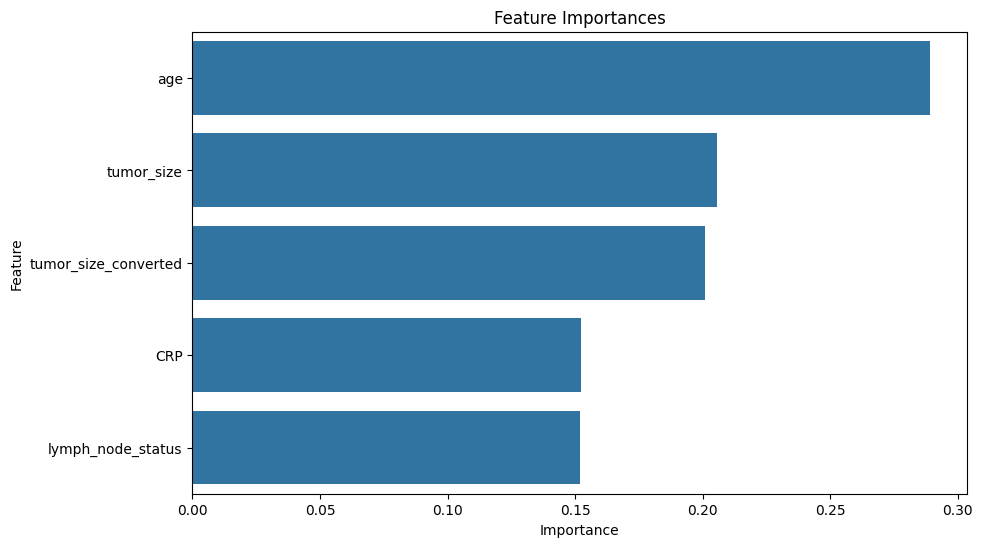

In [17]:
# 2. Check which features have highest predictive power wrt target variable

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming 'cancer_stage' is the target variable
X = df.drop(['cancer_stage'], axis=1)
y = df['cancer_stage']

# Use a tree-based model for feature importance
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()



In [18]:
# 3. Check features on which target is dependent. Use a mechanism that is different from previous method for this
from scipy.stats import chi2_contingency

# Assuming 'cancer_stage' is the target variable
target_variable = 'cancer_stage'

# Perform the chi-square test for each feature
dependent_features = []
for feature in df.columns:
    if feature != target_variable:
        contingency_table = pd.crosstab(df[feature], df[target_variable])
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        if p_value < 0.05:  # Set the significance level
            dependent_features.append(feature)

# Display the features on which the target variable is dependent
print(dependent_features)


[]


In [19]:
# 4. Base on the above two checks, choose 2 features for predicting cancer stage
# We can see that age, tumor size, and tumor size converted are the top 3 features based on feature importance. The target variable is not dependent
# on any of the features. So, we can choose any two features from age, tumor size, and tumor size converted for predicting cancer stage.
# Let's choose age and tumor size for predicting cancer stage.



*Perform train-test split*


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)

print(X_train.shape)
print(X_test.shape)

(150, 5)
(50, 5)


### V ML Prediction
1. Apply Logistic Regression to predict cancer stage
2. Choose a  metric that you think is most suitable for this scenario

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Create an instance of Logistic Regression
logreg = LogisticRegression()

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Fit the model on the training data
logreg.fit(X_train, y_train_encoded)

# Predict the target variable for the test data
y_pred_encoded = logreg.predict(X_test)

# Decode the predicted target variable
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Create an instance of Logistic Regression
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = logreg.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.38
Accuracy: 0.38
Accuracy: 0.38


c:\Users\MSIS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\MSIS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab